In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
# Load datasets
train_path = 'house_pred.csv'
test_path = 'test.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


In [11]:
# Preprocessing Function
def preprocess_data(data):
    # Separate numerical and categorical features
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns

    # Impute missing values
    num_imputer = SimpleImputer(strategy='mean')
    cat_imputer = SimpleImputer(strategy='most_frequent')

    data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    # Standardize numerical features
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    return data, numerical_cols, categorical_cols, scaler

# Preprocess train and test datasets
train_data, train_num_cols, train_cat_cols, scaler = preprocess_data(train_data)
test_data, test_num_cols, test_cat_cols, _ = preprocess_data(test_data)

Outlier detection for training dataset:


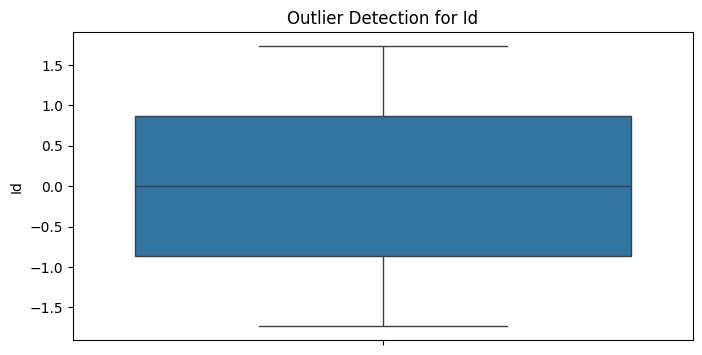

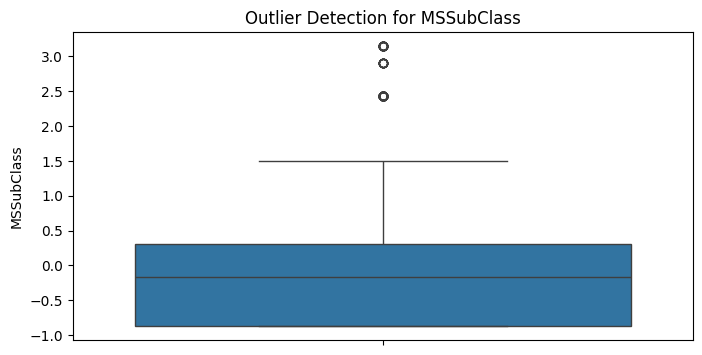

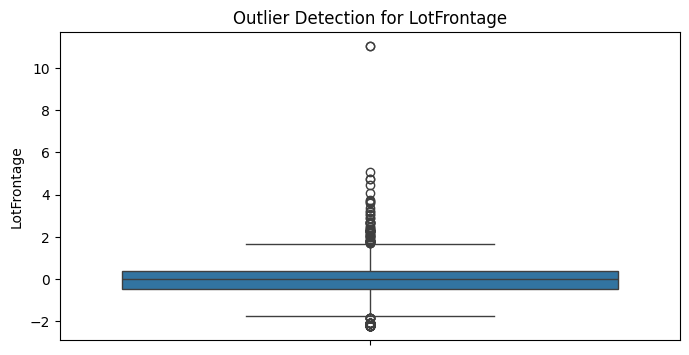

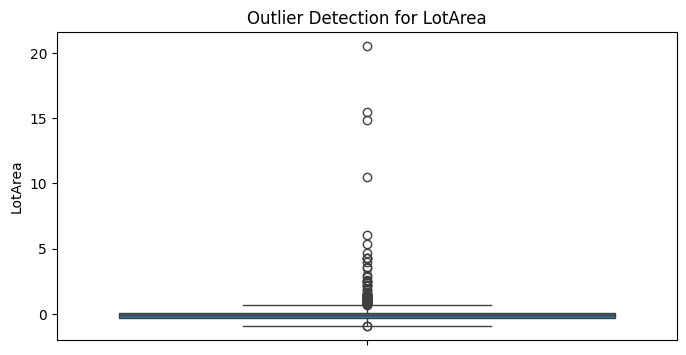

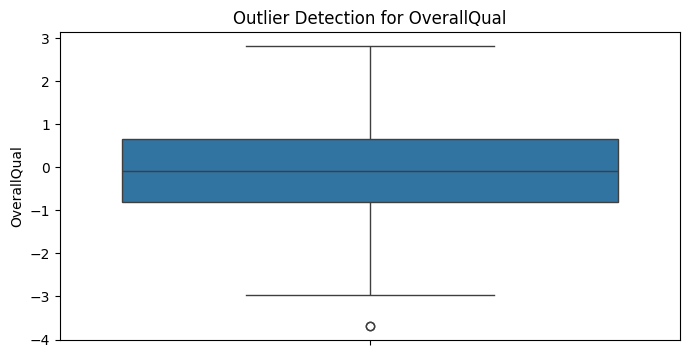

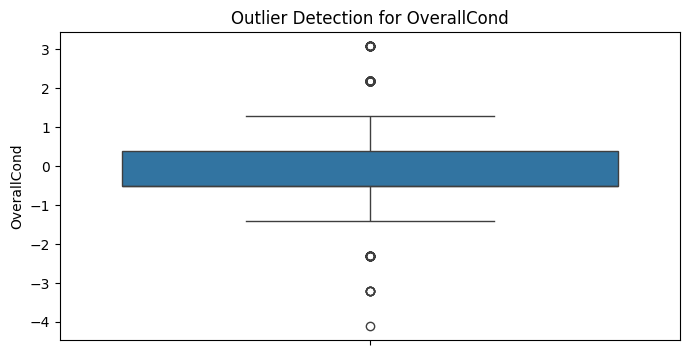

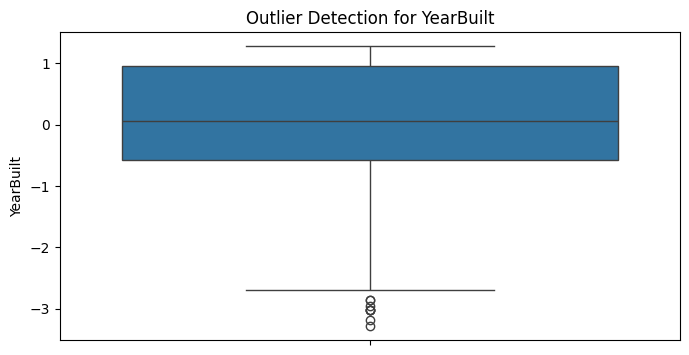

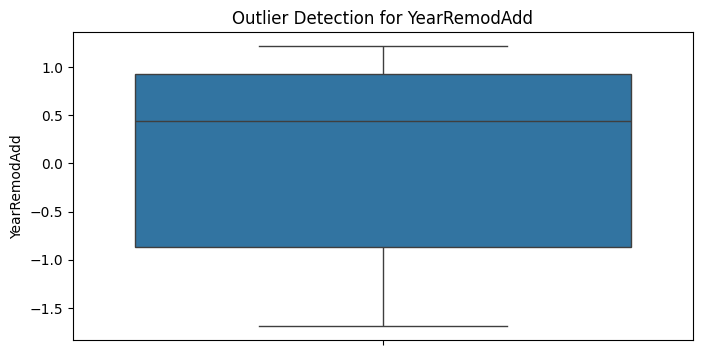

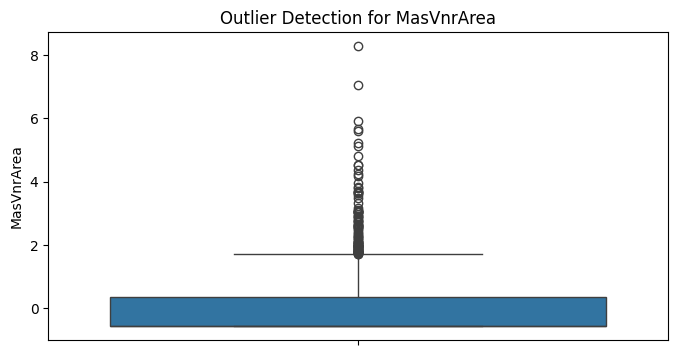

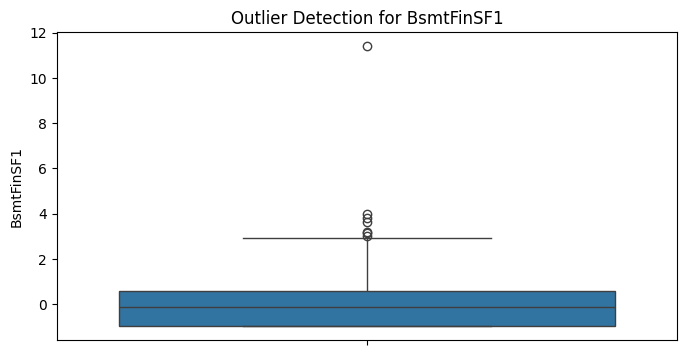

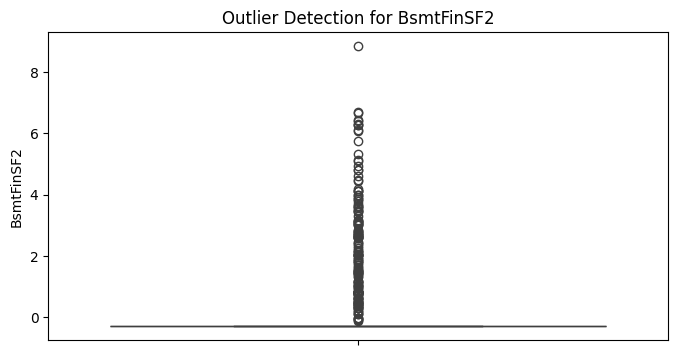

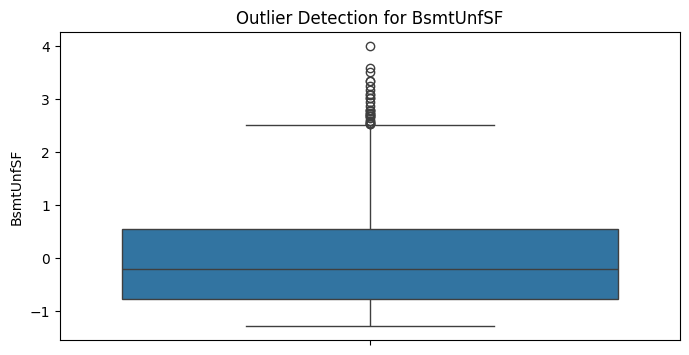

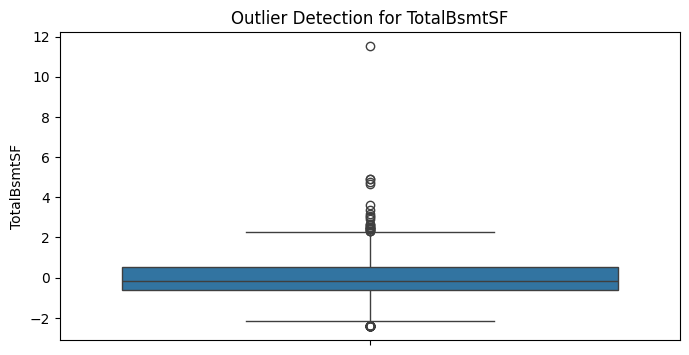

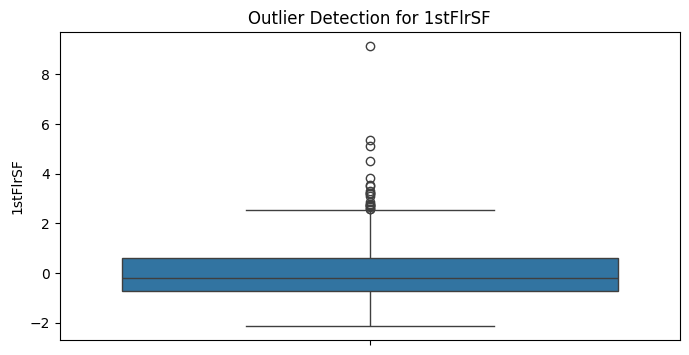

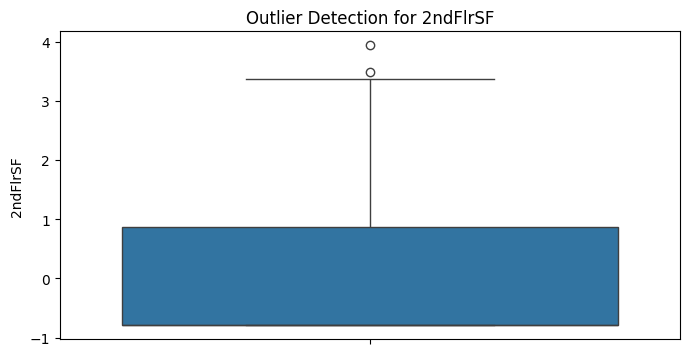

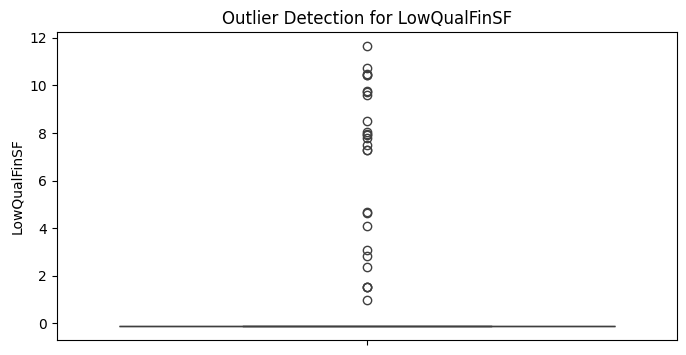

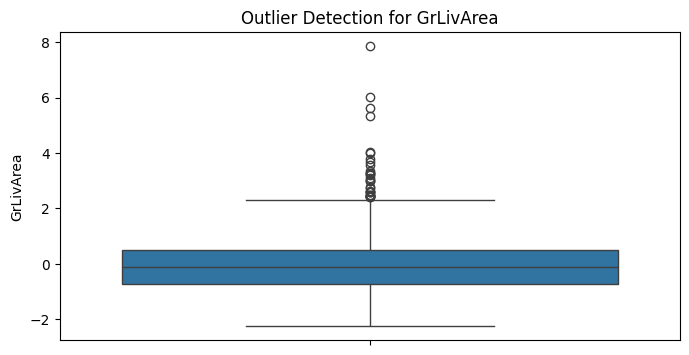

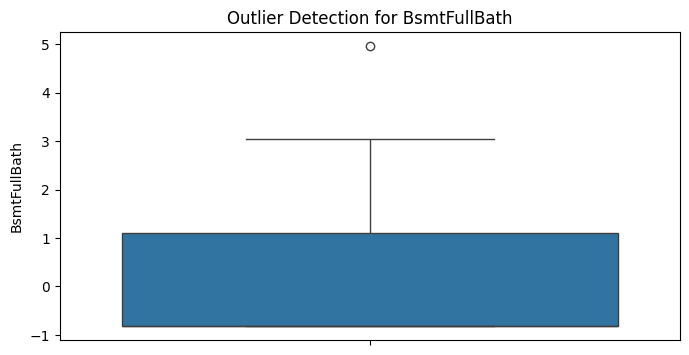

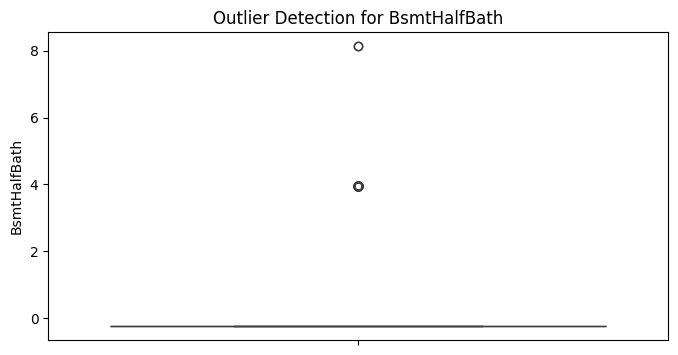

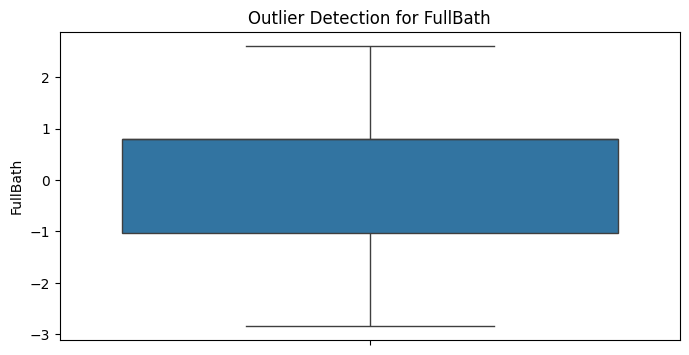

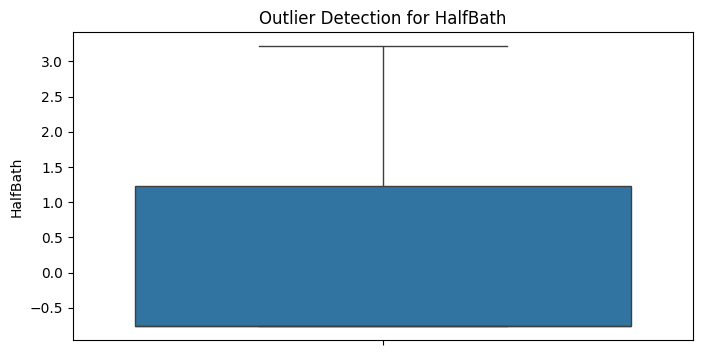

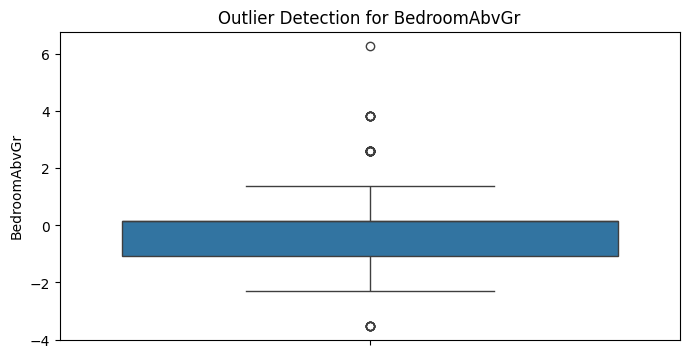

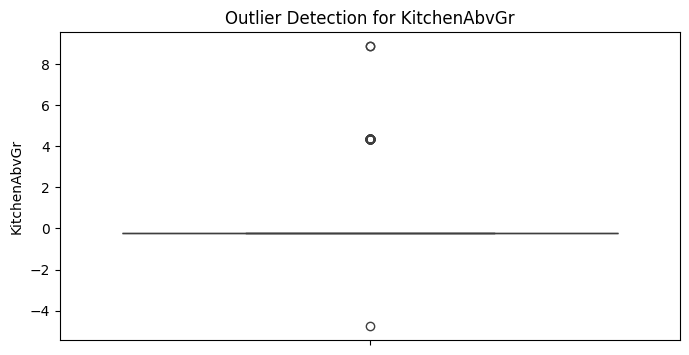

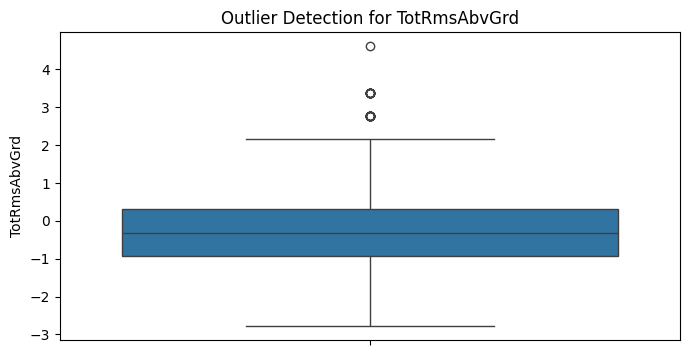

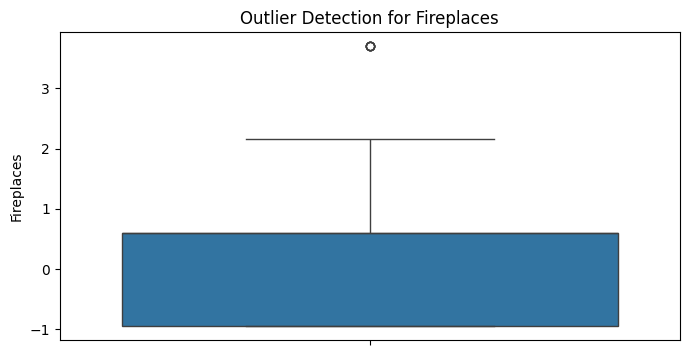

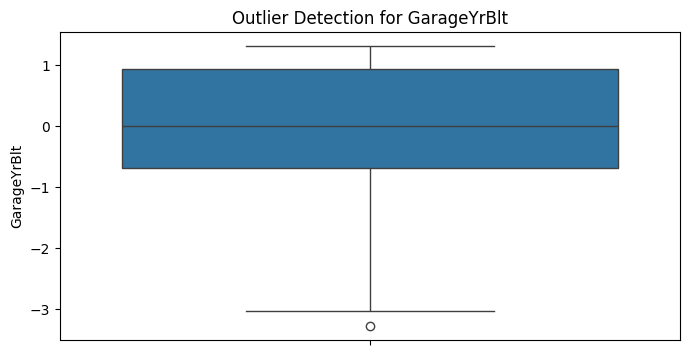

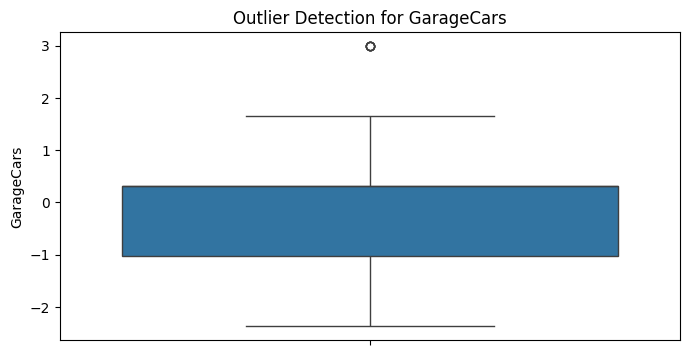

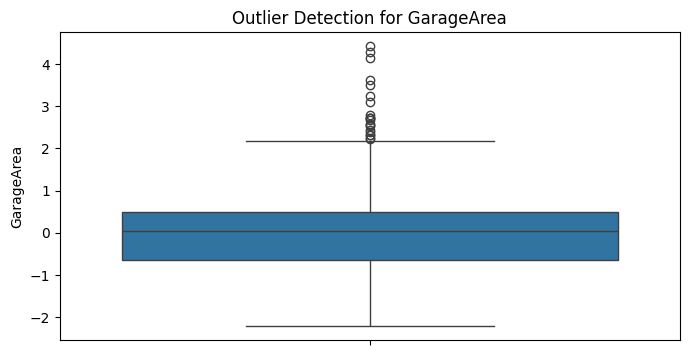

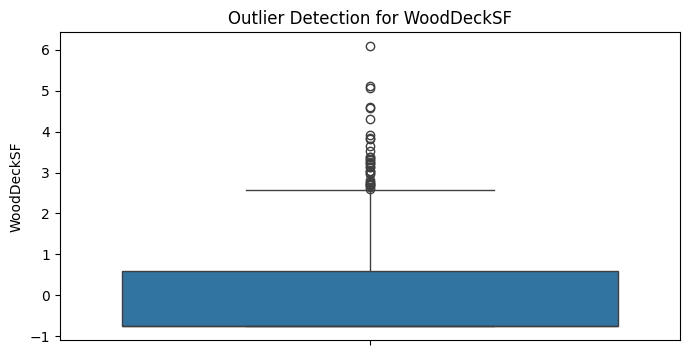

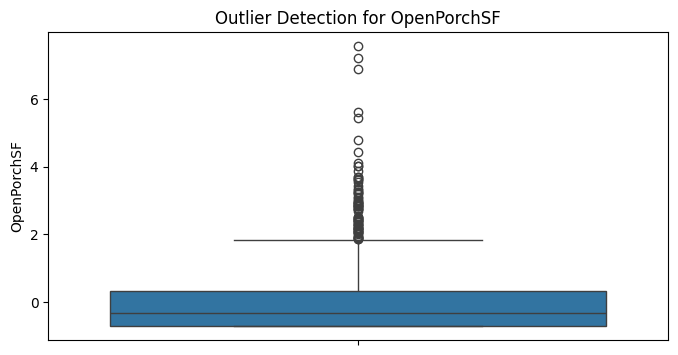

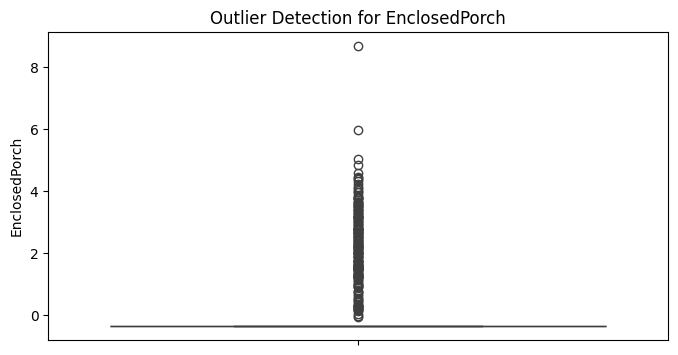

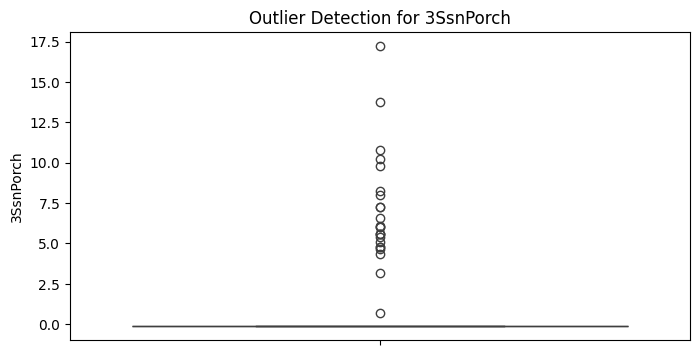

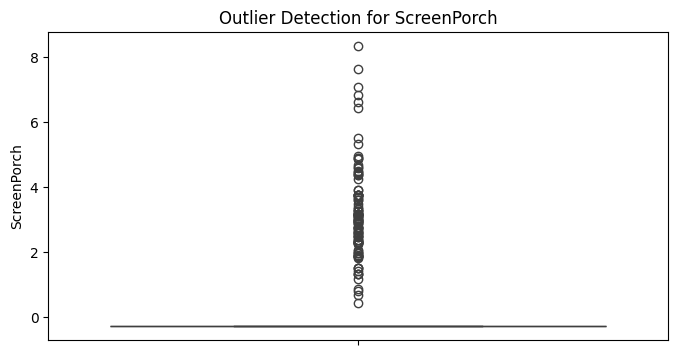

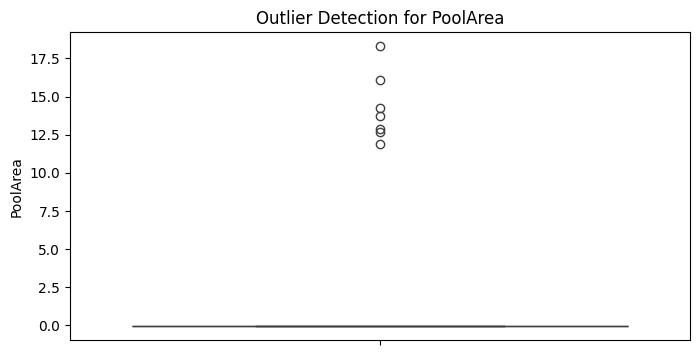

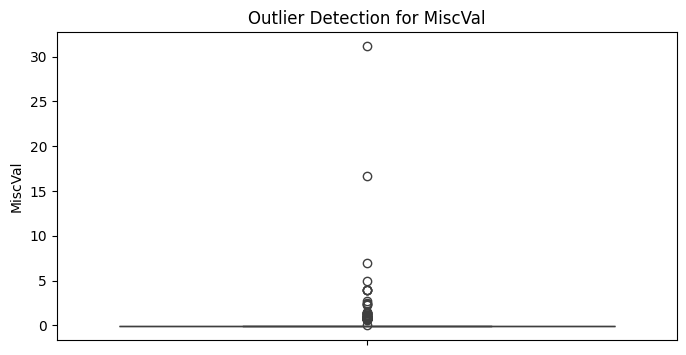

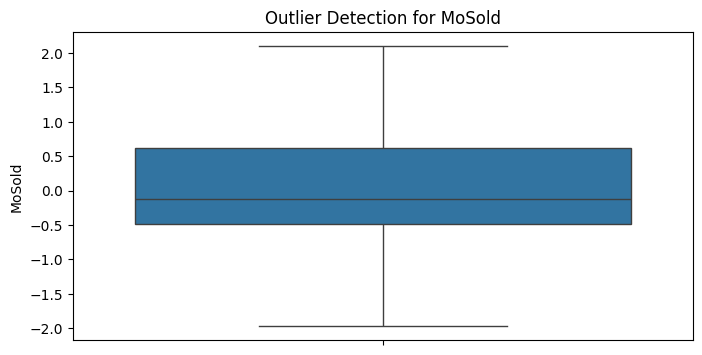

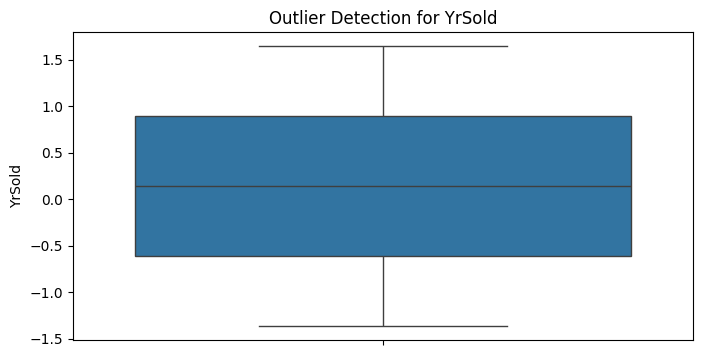

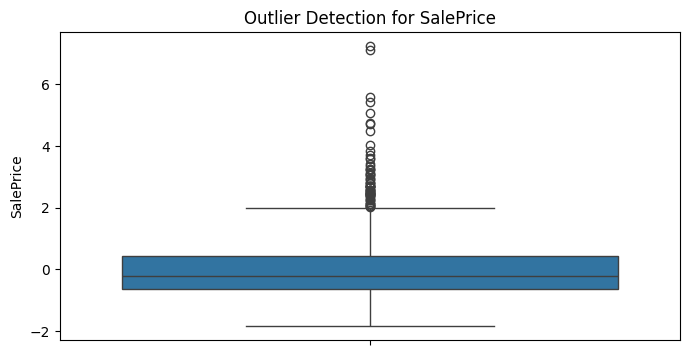

Outlier detection for test dataset:


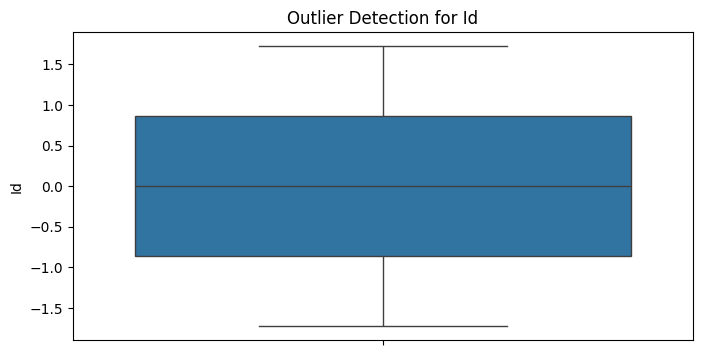

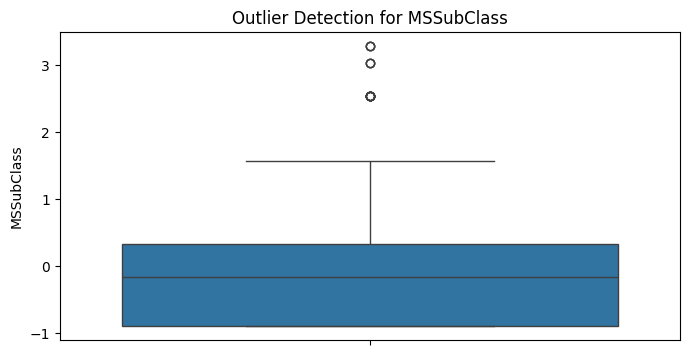

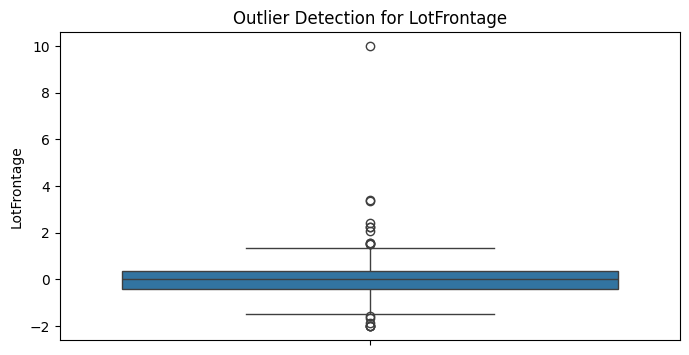

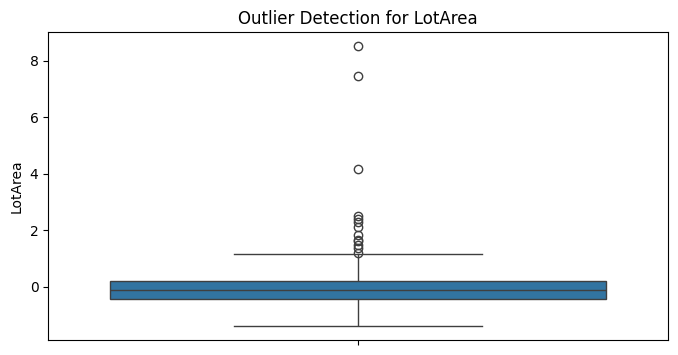

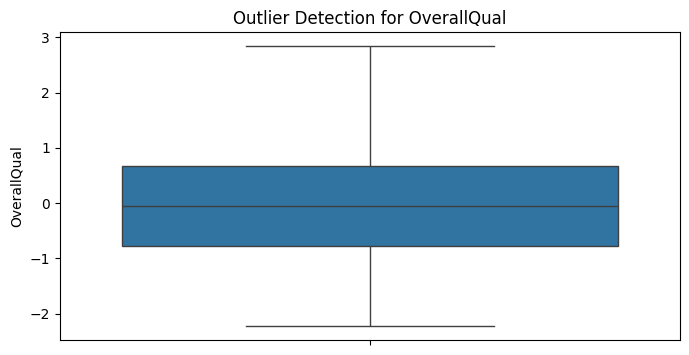

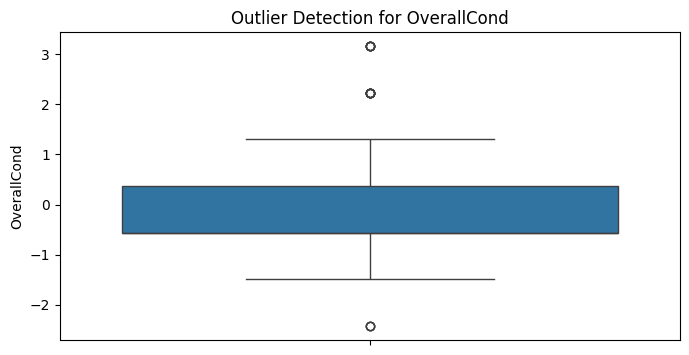

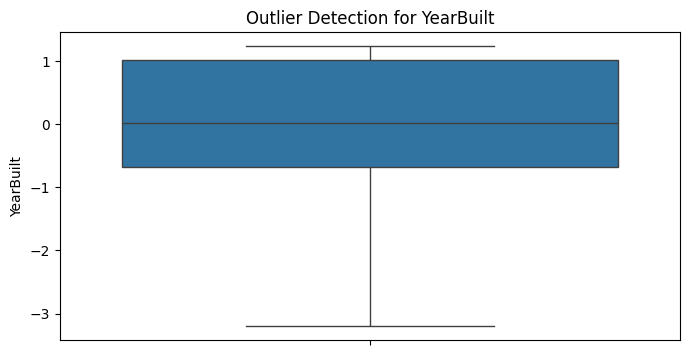

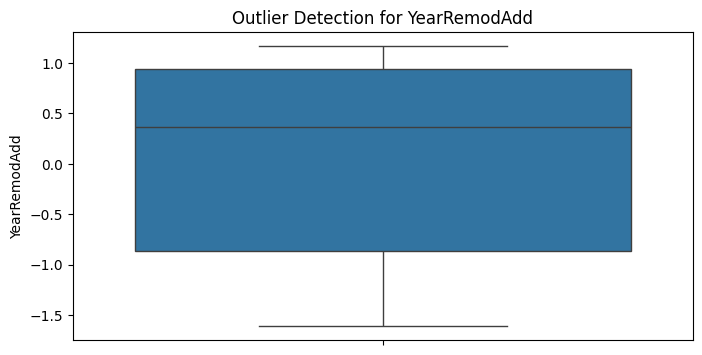

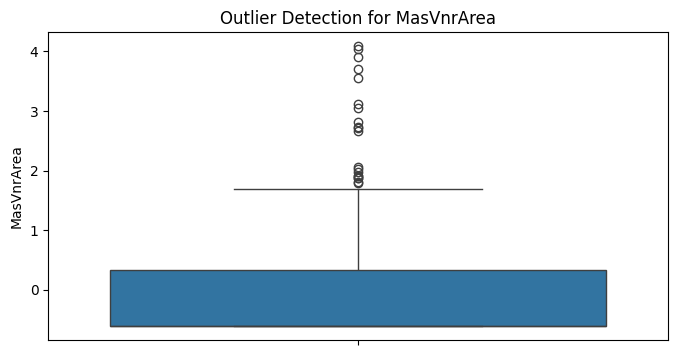

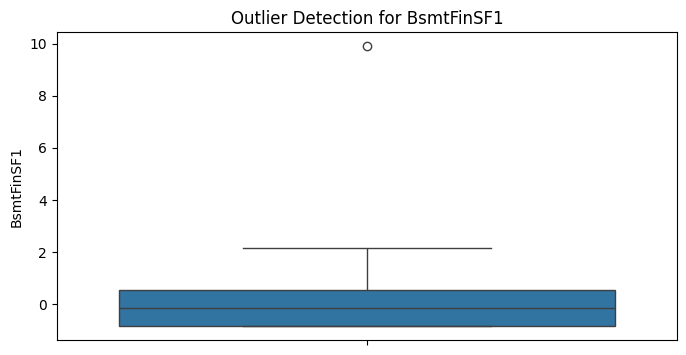

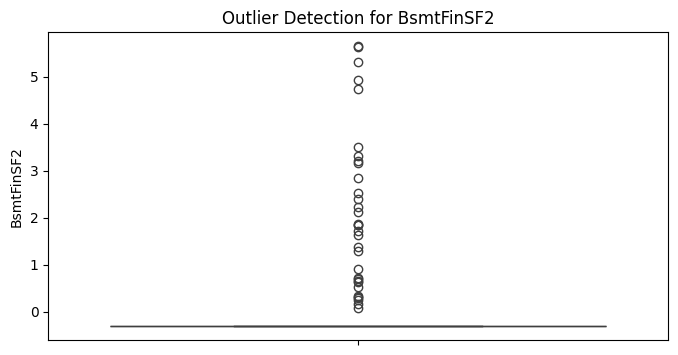

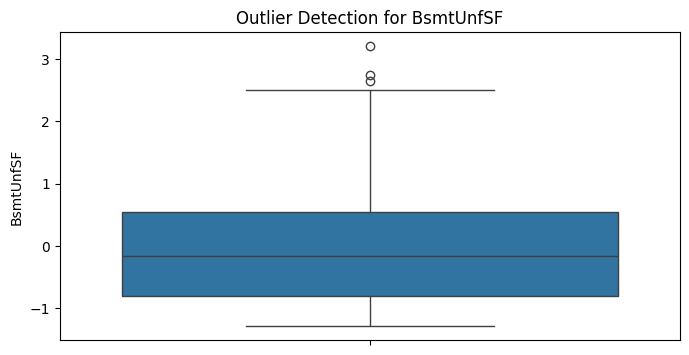

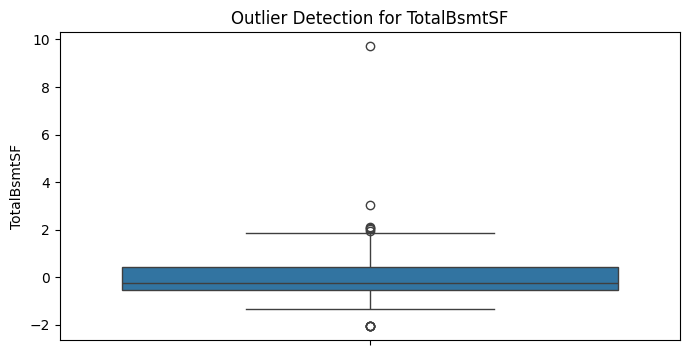

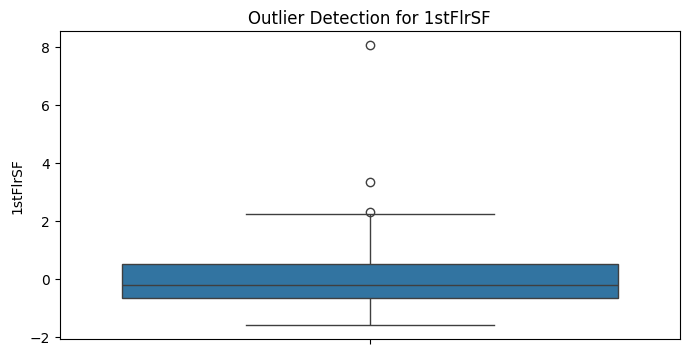

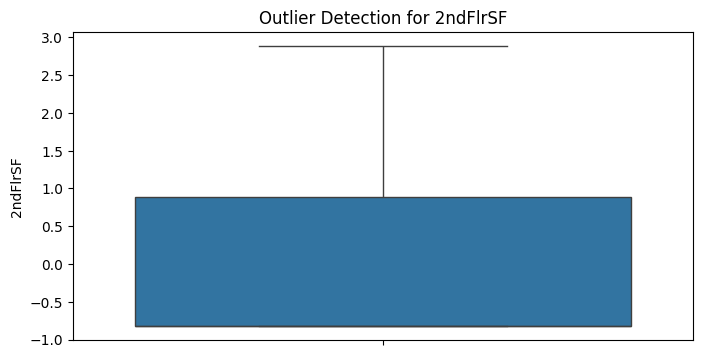

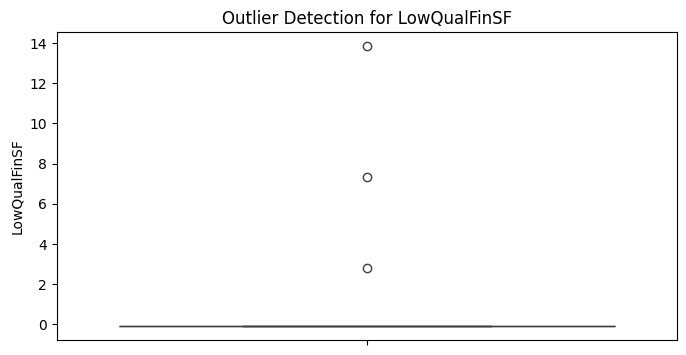

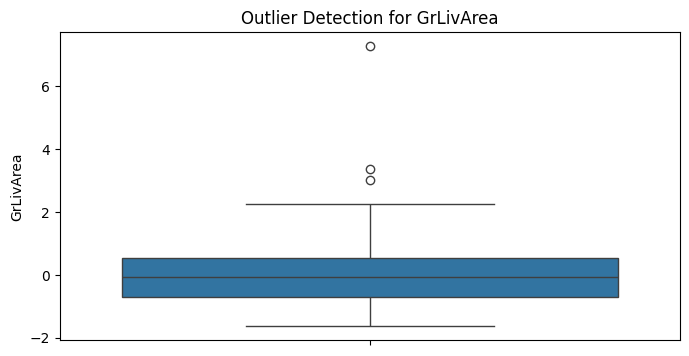

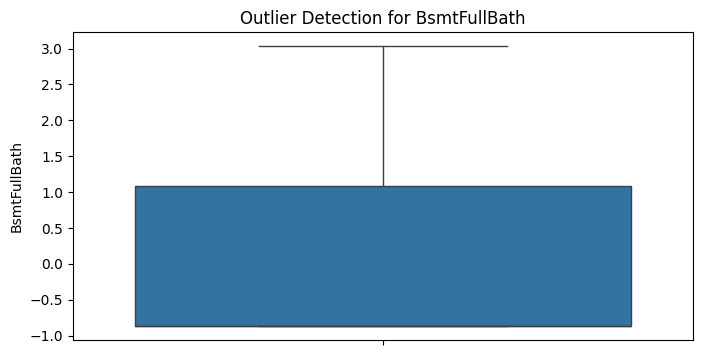

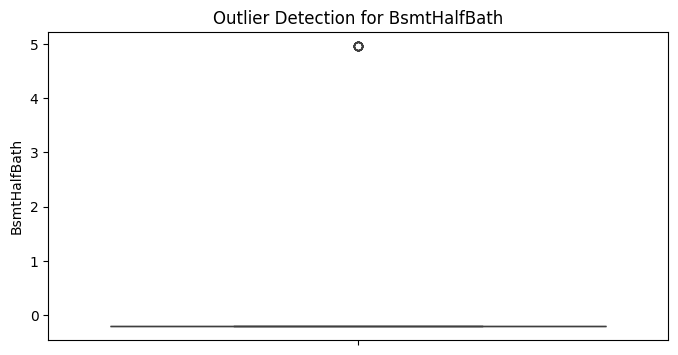

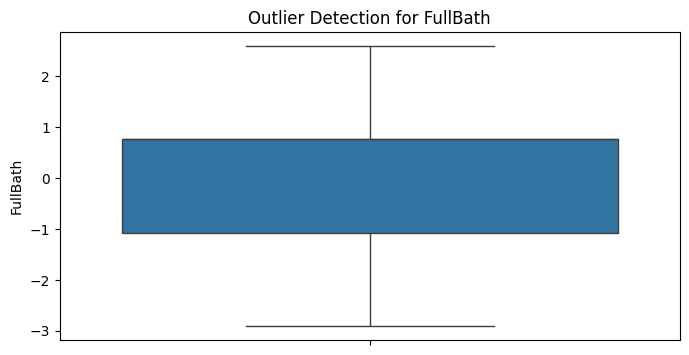

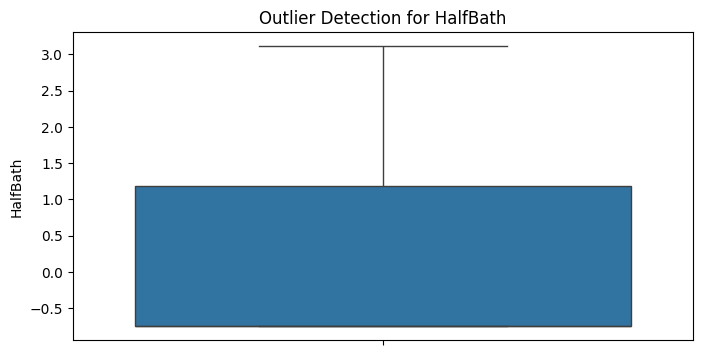

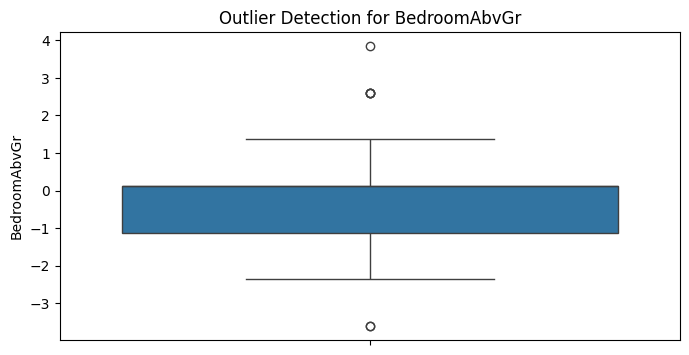

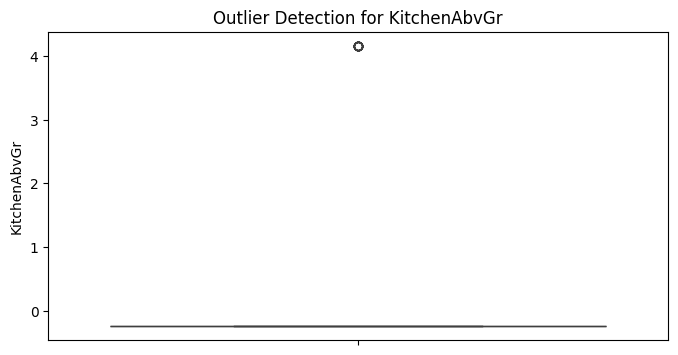

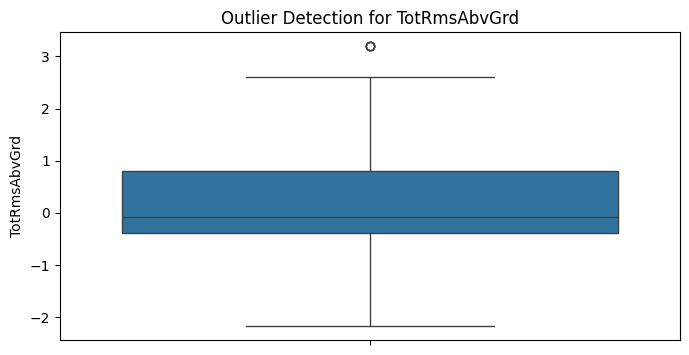

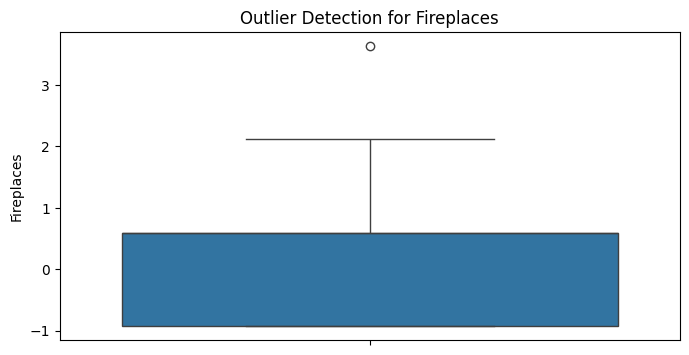

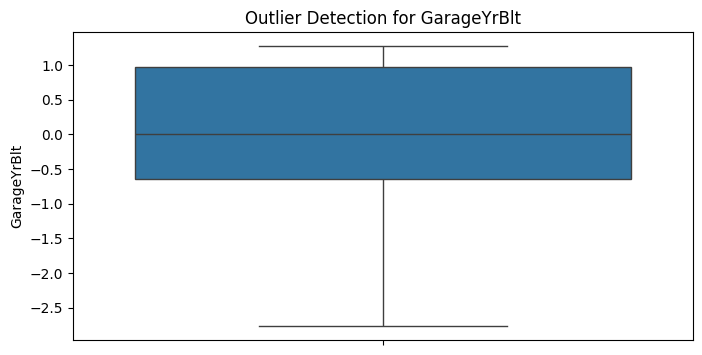

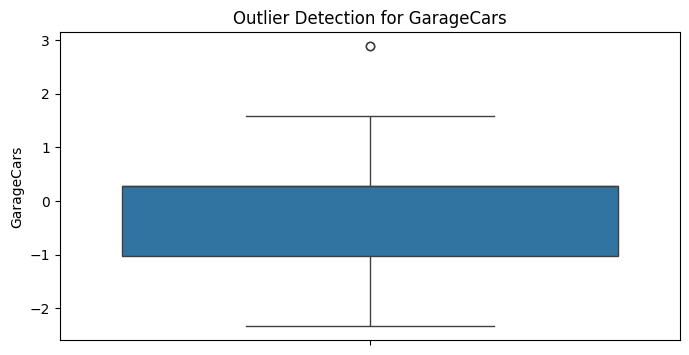

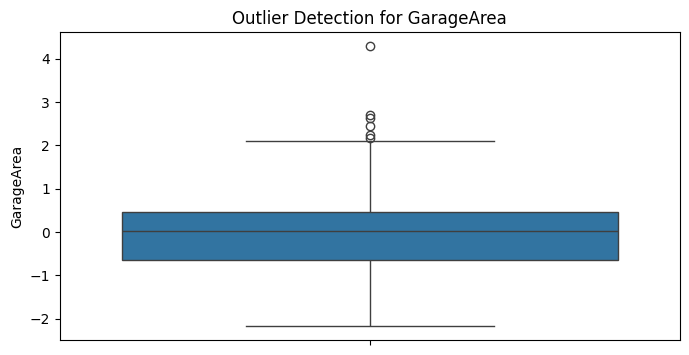

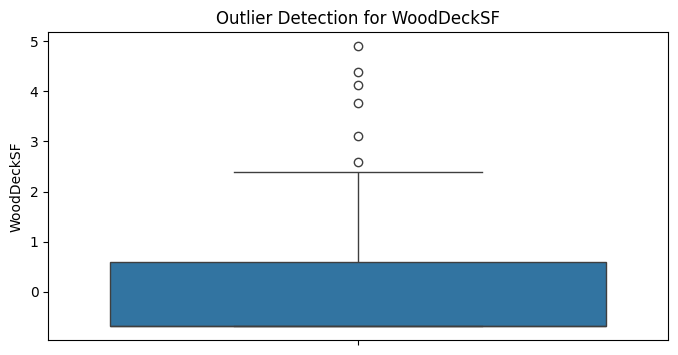

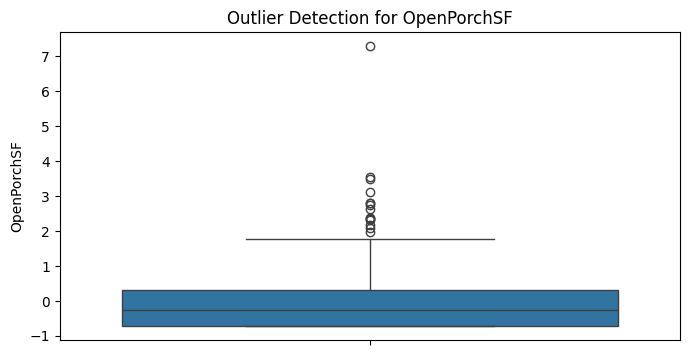

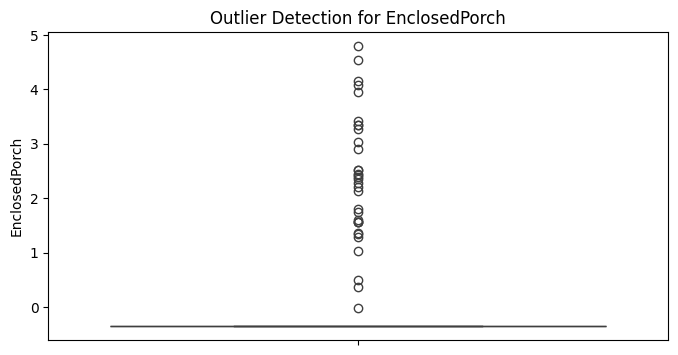

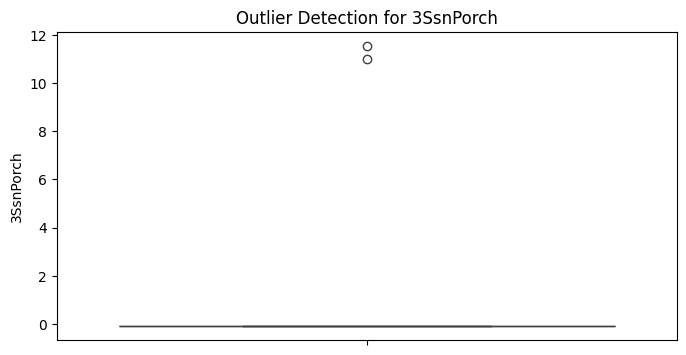

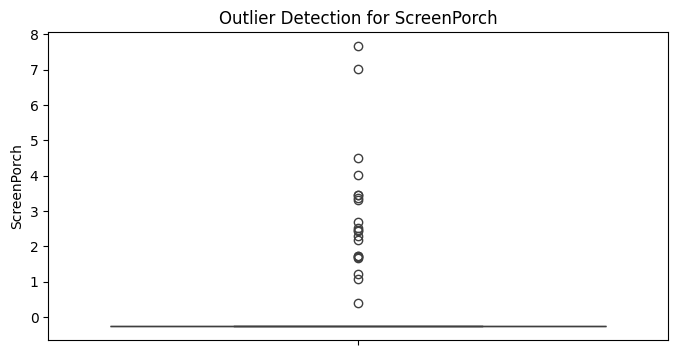

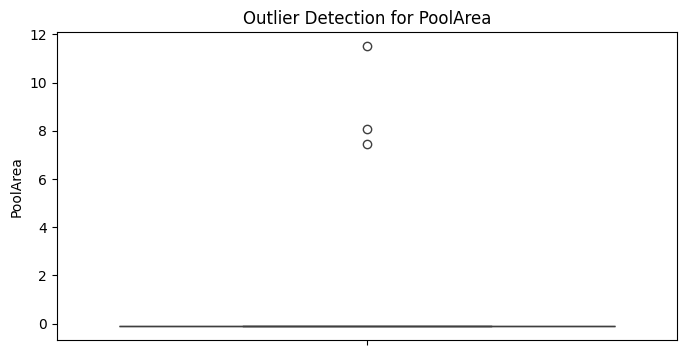

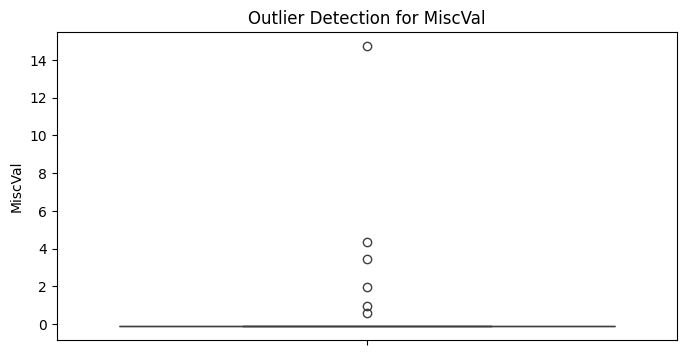

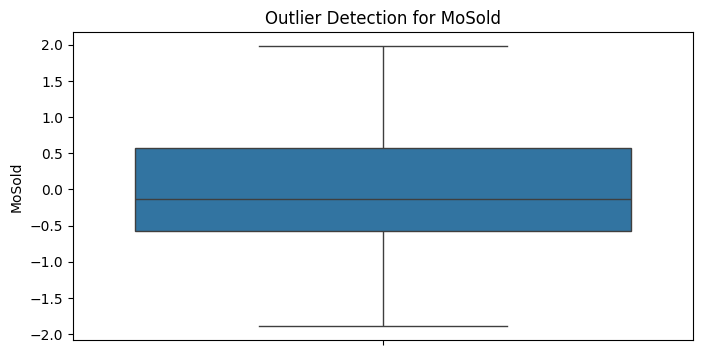

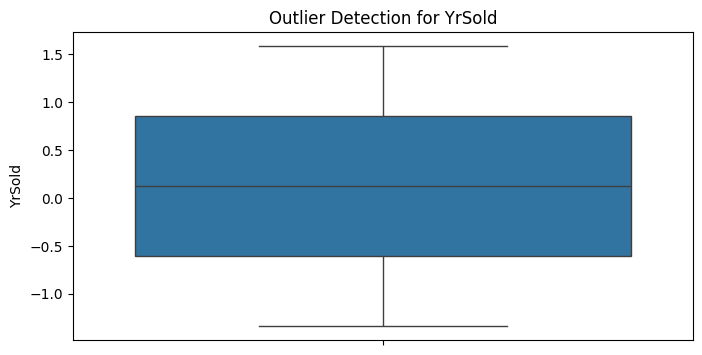

In [12]:
# Outlier Detection Function
def detect_outliers(data, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data[col])
        plt.title(f'Outlier Detection for {col}')
        plt.show()

# Check for Outliers
print("Outlier detection for training dataset:")
detect_outliers(train_data, train_num_cols)

print("Outlier detection for test dataset:")
detect_outliers(test_data, test_num_cols)

In [13]:
# Multi-Collinearity Check
def check_multicollinearity(data, numerical_cols):
    print("Calculating VIF...")
    vif_data = pd.DataFrame()
    vif_data['Feature'] = numerical_cols
    vif_data['VIF'] = [variance_inflation_factor(data[numerical_cols].values, i) for i in range(len(numerical_cols))]
    return vif_data

print("Checking multi-collinearity for training dataset:")
train_vif = check_multicollinearity(train_data, train_num_cols)
print(train_vif)

print("Checking multi-collinearity for test dataset:")
test_vif = check_multicollinearity(test_data, test_num_cols)
print(test_vif)

Checking multi-collinearity for training dataset:
Calculating VIF...


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature       VIF
0              Id  1.026980
1      MSSubClass  1.706939
2     LotFrontage  1.572906
3         LotArea  1.272285
4     OverallQual  3.750635
5     OverallCond  1.619347
6       YearBuilt  5.086609
7    YearRemodAdd  2.431879
8      MasVnrArea  1.426094
9      BsmtFinSF1       inf
10     BsmtFinSF2       inf
11      BsmtUnfSF       inf
12    TotalBsmtSF       inf
13       1stFlrSF       inf
14       2ndFlrSF       inf
15   LowQualFinSF       inf
16      GrLivArea       inf
17   BsmtFullBath  2.239679
18   BsmtHalfBath  1.153479
19       FullBath  2.954196
20       HalfBath  2.169000
21   BedroomAbvGr  2.387028
22   KitchenAbvGr  1.603380
23   TotRmsAbvGrd  4.947492
24     Fireplaces  1.591603
25    GarageYrBlt  3.378225
26     GarageCars  5.639019
27     GarageArea  5.469413
28     WoodDeckSF  1.228053
29    OpenPorchSF  1.222511
30  EnclosedPorch  1.284256
31      3SsnPorch  1.026200
32    ScreenPorch  1.118507
33       PoolArea  1.111252
34        MiscVal  1

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature       VIF
0              Id  1.143916
1      MSSubClass  2.002276
2     LotFrontage  2.237557
3         LotArea  2.085839
4     OverallQual  3.548750
5     OverallCond  1.609075
6       YearBuilt  6.334869
7    YearRemodAdd  2.788824
8      MasVnrArea  1.605267
9      BsmtFinSF1       inf
10     BsmtFinSF2       inf
11      BsmtUnfSF       inf
12    TotalBsmtSF       inf
13       1stFlrSF       inf
14       2ndFlrSF       inf
15   LowQualFinSF       inf
16      GrLivArea       inf
17   BsmtFullBath  2.401609
18   BsmtHalfBath  1.157547
19       FullBath  3.023592
20       HalfBath  2.255488
21   BedroomAbvGr  2.847205
22   KitchenAbvGr  1.997314
23   TotRmsAbvGrd  5.294223
24     Fireplaces  1.877784
25    GarageYrBlt  3.561338
26     GarageCars  6.341126
27     GarageArea  7.066555
28     WoodDeckSF  1.287864
29    OpenPorchSF  1.423062
30  EnclosedPorch  1.578783
31      3SsnPorch  1.113054
32    ScreenPorch  1.320188
33       PoolArea  1.496328
34        MiscVal  1

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
y_train = train_data['SalePrice']
X_train = train_data.drop(columns=['SalePrice'])

In [16]:
common_columns = X_train.columns.intersection(test_data.columns)
X_train = X_train[common_columns]
X_test = test_data[common_columns]

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [19]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse}")

Training RMSE: 0.31626630358686003


In [20]:
print("Predicted house prices for the test dataset:")
print(y_test_pred)

Predicted house prices for the test dataset:
[-5.40082483e-01  8.56372213e-01 -7.94031950e-01  4.11105992e-01
 -4.57448072e-01  1.43705161e+00  2.05622287e-01 -8.33232324e-03
 -1.06954267e+00 -4.88977042e-01 -7.04097829e-01 -1.01279284e+00
 -9.14789266e-01  6.82025252e-01 -1.46690445e+00 -1.14883390e+00
 -1.06637407e+00 -8.38537753e-01 -1.89736309e-01 -5.01907645e-01
  3.60097237e-01 -4.69955565e-01  6.38021389e-01 -3.35509688e-01
  2.03186514e+00 -6.54304502e-01  8.89815311e-02 -6.40480767e-01
 -1.33542803e+00 -5.67258116e-01 -7.91793335e-01 -3.49873207e-01
 -1.69011029e-01  3.71666911e-01 -5.84023842e-01  7.90892876e-01
  3.55482753e-01  7.35672021e-01 -3.87036428e-02  2.81910200e+00
  3.25520794e-01  4.05774785e-01  3.00277912e-01 -4.08888529e-01
 -7.27094311e-01 -7.02785716e-01  1.12582696e+00  4.19286534e-02
 -8.65330687e-01  1.18220596e+00 -4.18050021e-02 -6.93671575e-01
  1.70453328e+00 -1.18343940e+00  3.19156312e-01 -4.23462473e-01
 -9.48852866e-02 -7.65238320e-01 -4.26831924e

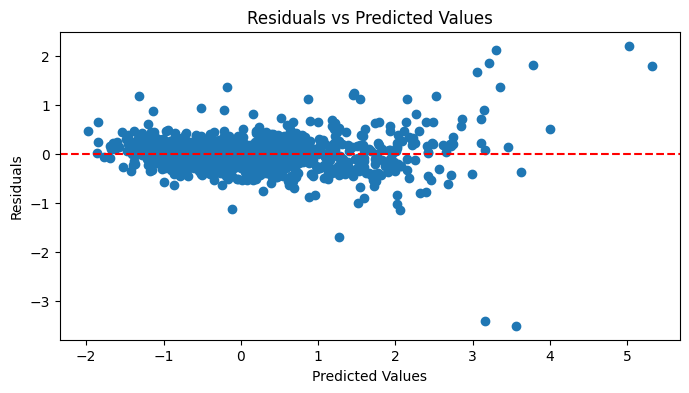

In [21]:
import matplotlib.pyplot as plt
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
